# Computational Photography
## Duke Kunshan University Spring 2018
### David Brady
Wednesday 28 February 2018

This is a the first Jupyter Notebook for discussion in class

Homework must be presented in the form of Jupyter notebooks and must run using the Phython 3 kernel.

Python code uses "modules." The numpy module includes numerical functions such as sin, cos, etc. matplotlib includes ploting and display functions. skimage is an image processing platform. skimage.io includes image read and image save functions. skimage.transform includes various image tranformation functions. glob allows us to convert file names to strings for use in code. subprocess is a module that allows us to run shell commands from python code

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import skimage
import skimage.io as imio
import skimage.transform as trans
from skimage.viewer import ImageViewer
import glob
from time import gmtime, strftime
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 

C:\Users\djbrady\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
a=subprocess.run('bash -c ls',stdout=subprocess.PIPE, shell=True)
a.stdout

b'captureAndDisplay.ipynb\nCompression.ipynb\ndog.jpg\nfocus.ipynb\ngrabVideo.py\nNoise.ipynb\nrawFormatColor.ipynb\nrawFormat.ipynb\nSimpleExamples.ipynb\nUntitled1.ipynb\nUntitled.ipynb\n'

In [10]:
subprocess.run("""bash -c 'rsh ubuntu@10.0.1.6 "ls dbGrab*" '""", \
                stdout=subprocess.PIPE, shell=True)

CompletedProcess(args='bash -c \'rsh ubuntu@10.0.1.6 "ls dbGrab*" \'', returncode=0, stdout=b'dbGrab_1574_s01_00000.jpg\ndbGrab_1637_s01_00000.jpg\ndbGrab_1847_s01_00000.jpg\n')

###### The first cell below talks to a computer at address 10.0.1.6 and runs code on it. We will look at the tegra platform in class on Monday. 

'Wed, 28 Feb 2018 07:04:20'

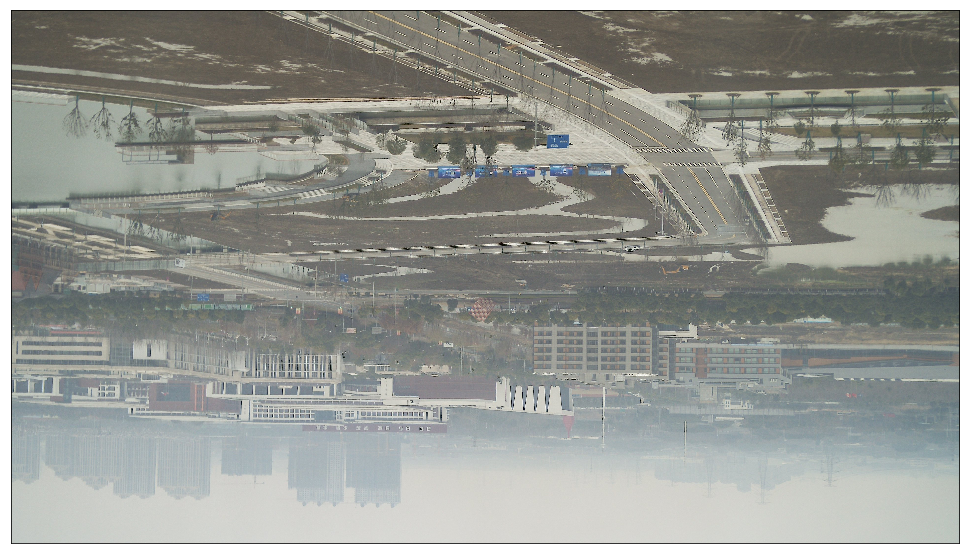

In [11]:
subprocess.run('bash -c "rm dbGrab*"', \
               stdout=subprocess.PIPE, shell=True)
subprocess.run("""bash -c 'rsh ubuntu@10.0.1.6 "rm dbGrab*"'""", \
               stdout=subprocess.PIPE, shell=True)
subprocess.run("""bash -c 'rsh ubuntu@10.0.1.6 "nvgstcapture-1.0 -m 1 --sensor-id 1 -A --capture-auto 1 --file-name dbGrab --image-res 8"'""", \
                stdout=subprocess.PIPE, shell=True)
subprocess.run('bash -c "rcp ubuntu@10.0.1.6:dbGrab* ."', \
               stdout=subprocess.PIPE, shell=True)
subprocess.run("""bash -c 'rsh ubuntu@10.0.1.6 "rm dbGrab*"'""", \
               stdout=subprocess.PIPE, shell=True)
imCap=glob.glob("db*")[0]
pop=imio.imread(imCap)
pop=skimage.transform.rotate(pop,180)
fig=imio.imshow(pop)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
strftime("%a, %d %b %Y %H:%M:%S", gmtime())



In [39]:
subprocess.Popen("""bash -c 'rsh ubuntu@10.0.1.8 "nvgstcapture-1.0 -m 1 --sensor-id 1 -A -S 1 --capture-auto 1 \
                --file-name dbRepeat --image-res 8 --capture-gap 1000 -C 100"'""", stdout=subprocess.PIPE, shell=True)

In [12]:
pip=imio.imread("dog.jpg")

In [13]:
pip.shape

(2160, 3840, 3)

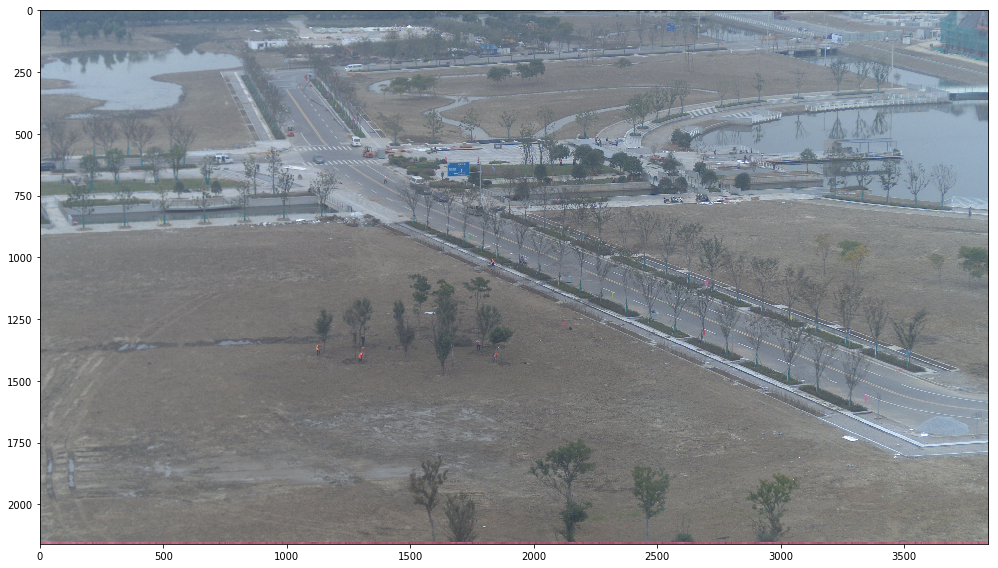

In [4]:
imio.imshow(pip)

In [5]:
imio.imsave("dog.jpg",pip)

/home/dbrady/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


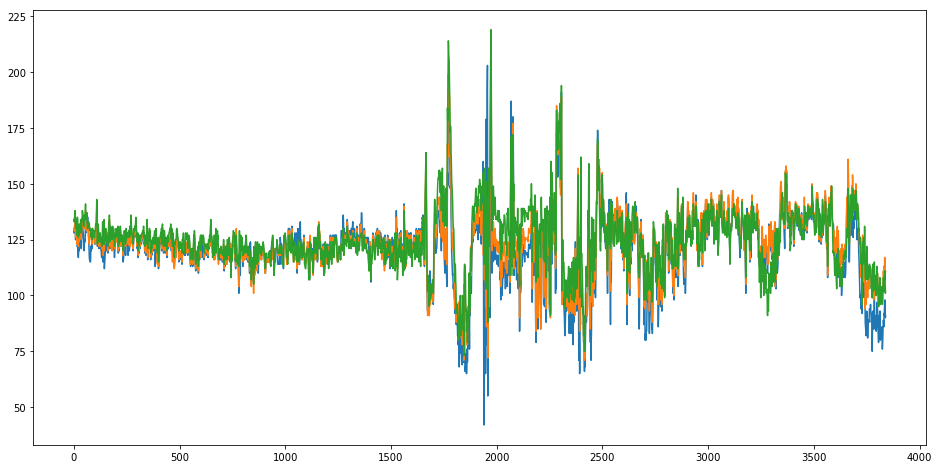

In [4]:
plt.plot(pip[1000,:,:])

In [7]:
from skimage.viewer.plugins.lineprofile import LineProfile

viewer = ImageViewer(pip)
viewer += LineProfile(viewer)
overlay, data = viewer.show()[0]

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


In [9]:
help(skimage.draw)

Help on package skimage.draw in skimage:

NAME
    skimage.draw

PACKAGE CONTENTS
    _draw
    draw
    draw3d
    setup
    tests (package)

FUNCTIONS
    bezier_curve(r0, c0, r1, c1, r2, c2, weight, shape=None)
        Generate Bezier curve coordinates.
        
        Parameters
        ----------
        r0, c0 : int
            Coordinates of the first control point.
        r1, c1 : int
            Coordinates of the middle control point.
        r2, c2 : int
            Coordinates of the last control point.
        weight : double
            Middle control point weight, it describes the line tension.
        shape : tuple, optional
            Image shape which is used to determine the maximum extent of output
            pixel coordinates. This is useful for curves that exceed the image
            size. If None, the full extent of the curve is used.
        
        Returns
        -------
        rr, cc : (N,) ndarray of int
            Indices of pixels that belong to th

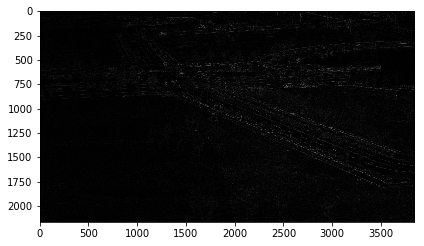

In [19]:
pep=skimage.filters.edges.scharr(pip[:,:,1])
imio.imshow(pep)

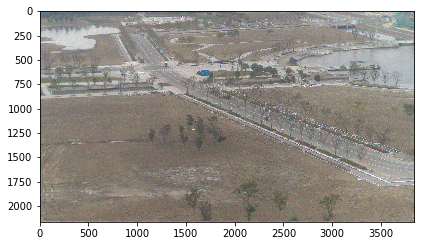

In [13]:
imio.imshow(pip)

In [25]:
help(skimage.transform.resize)

Help on function resize in module skimage.transform._warps:

resize(image, output_shape, order=1, mode=None, cval=0, clip=True, preserve_range=False)
    Resize image to match a certain size.
    
    Performs interpolation to up-size or down-size images. For down-sampling
    N-dimensional images by applying a function or the arithmetic mean, see
    `skimage.measure.block_reduce` and `skimage.transform.downscale_local_mean`,
    respectively.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    output_shape : tuple or ndarray
        Size of the generated output image `(rows, cols[, dim])`. If `dim` is
        not provided, the number of channels is preserved. In case the number
        of input channels does not equal the number of output channels a
        3-dimensional interpolation is applied.
    
    Returns
    -------
    resized : ndarray
        Resized version of the input.
    
    Other parameters
    ----------------
    order : int, optional


In [32]:
 pap=trans.resize(pip,(540,960),3)

C:\Users\djbrady\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


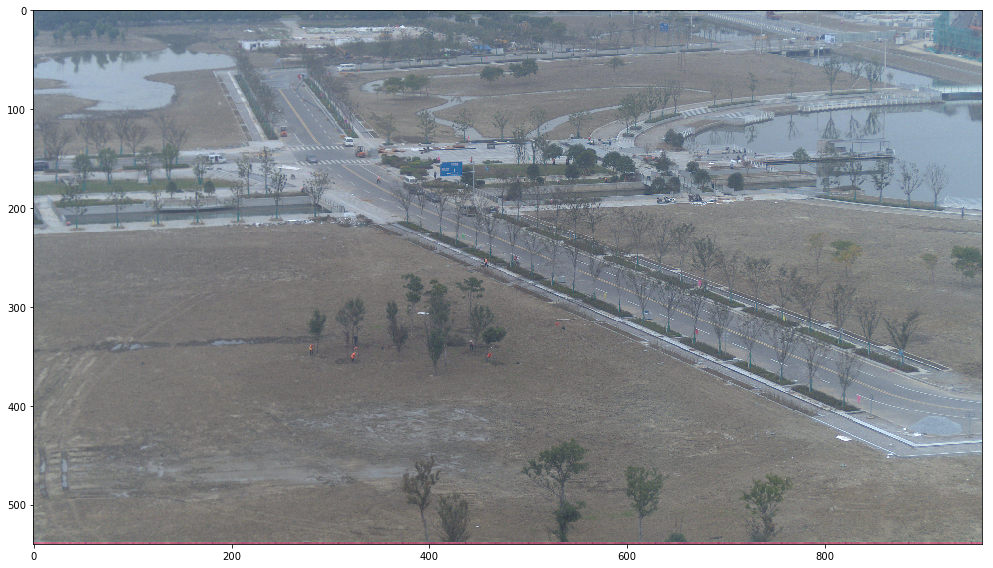

In [33]:
imio.imshow(pap)

In [34]:
from skimage.viewer.plugins.lineprofile import LineProfile

viewer = ImageViewer(pap)
viewer += LineProfile(viewer)
overlay, data = viewer.show()[0]

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

TypeError: '<' not supported between instances of 'float' and 'ImageViewer'

In [36]:
help(skimage)

Help on package skimage:

NAME
    skimage - Image Processing SciKit (Toolbox for SciPy)

DESCRIPTION
    ``scikit-image`` (a.k.a. ``skimage``) is a collection of algorithms for image
    processing and computer vision.
    
    The main package of ``skimage`` only provides a few utilities for converting
    between image data types; for most features, you need to import one of the
    following subpackages:
    
    Subpackages
    -----------
    color
        Color space conversion.
    data
        Test images and example data.
    draw
        Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
    exposure
        Image intensity adjustment, e.g., histogram equalization, etc.
    feature
        Feature detection and extraction, e.g., texture analysis corners, etc.
    filters
        Sharpening, edge finding, rank filters, thresholding, etc.
    graph
        Graph-theoretic operations, e.g., shortest paths.
    io
        Reading, saving, and displaying images 